In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Credit_card_dataset.csv')

Import Data and Perform Basic Exploration

In [3]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CUST_ID            8950 non-null   object 
 1   BALANCE_FREQUENCY  8950 non-null   float64
 2   PURCHASES          8950 non-null   float64
 3   PAYMENTS           8950 non-null   float64
 4   CREDIT_LIMIT       8949 non-null   float64
 5   CASH_ADVANCE       8950 non-null   float64
dtypes: float64(5), object(1)
memory usage: 419.7+ KB
None


In [4]:
df.shape

(8950, 6)

In [5]:
df.describe()

,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
count,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000
mean,0.877271,1003.204834,1733.143852,4494.449450,978.871112
std,0.236904,2136.634782,2895.063757,3638.815725,2097.163877
min,0.000000,0.000000,0.000000,50.000000,0.000000
25%,0.888889,39.635000,383.276166,1600.000000,0.000000
50%,1.000000,361.280000,856.901546,3000.000000,0.000000
75%,1.000000,1110.130000,1901.134317,6500.000000,1113.821139
max,1.000000,49039.570000,50721.483360,30000.000000,47137.211760


In [6]:
df.head(5)

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,C10001,0.818182,95.40,201.802084,1000.0,0.000000
1,C10002,0.909091,0.00,4103.032597,7000.0,6442.945483
2,C10003,1.000000,773.17,622.066742,7500.0,0.000000
3,C10004,0.636364,1499.00,0.000000,7500.0,205.788017
4,C10005,1.000000,16.00,678.334763,1200.0,0.000000


Data Preparation

Data Preparation

In [7]:
df = df.drop('CUST_ID', axis=1)

In [11]:
# Check for missing values
df.isna().sum() / df.shape[0] * 100

,0
BALANCE_FREQUENCY,0.0
PURCHASES,0.0
PAYMENTS,0.0
CREDIT_LIMIT,0.0
CASH_ADVANCE,0.0


In [9]:
# Handle missing values (example: fill with mean or median)
df.fillna(df.mean(), inplace=True)

In [11]:
# # # Handle missing values
# for col in df.columns:
#      # Check if the column is numeric
#      if pd.api.types.is_numeric_dtype(df[col]):
#          df[col].fillna(df[col].mean(), inplace=True)
# #     else:
# #         # Handle missing values in non-numeric columns (e.g., fill with mode or a constant)
#          df[col].fillna(df[col].mode()[0], inplace=True)

Data Encoding

Handling Outliers
Outliers can significantly impact clustering results. Use Z-score or IQR methods to handle them:

In [10]:
from scipy import stats

# Z-score method
z_scores = stats.zscore(df)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
data = df[filtered_entries]

In [12]:
data

,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,0.818182,95.40,201.802084,1000.0,0.000000
1,0.909091,0.00,4103.032597,7000.0,6442.945483
2,1.000000,773.17,622.066742,7500.0,0.000000
3,0.636364,1499.00,0.000000,7500.0,205.788017
4,1.000000,16.00,678.334763,1200.0,0.000000
...,...,...,...,...,...
8945,1.000000,291.12,325.594462,1000.0,0.000000
8946,1.000000,300.00,275.861322,1000.0,0.000000
8947,0.833333,144.40,81.270775,1000.0,0.000000
8948,0.833333,0.00,52.549959,500.0,36.558778


In [ ]:
# Calculate Z-scores:


# z_scores = stats.zscore(df)
# stats.zscore(df) calculates the Z-scores for each value in the DataFrame df. Each value is standardized to indicate how many standard deviations it is from the mean of its column.
# Calculate Absolute Z-scores:


# abs_z_scores = np.abs(z_scores)
# np.abs(z_scores) computes the absolute values of the Z-scores. This is because you’re interested in how far values are from the mean, regardless of direction.
# Filter Entries Based on Z-score Threshold:



# filtered_entries = (abs_z_scores < 3).all(axis=1)
# (abs_z_scores < 3) creates a boolean array where each entry is True if the Z-score is less than 3 (i.e., the data point is within 3 standard deviations from the mean) and False otherwise.
# .all(axis=1) ensures that all Z-scores in a row (across all columns) are within the threshold. This means that only rows where all column Z-scores are less than 3 will be True.
# Filter the DataFrame:

# data = df[filtered_entries]
# df[filtered_entries] uses the boolean array to filter the rows of the DataFrame, keeping only those rows where all column Z-scores are within the specified threshold.

Hierarchical Clustering

In [13]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

In [25]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(df)  # Scale the features

# Compute the distance matrix
distance_matrix = pdist(features_scaled, metric='euclidean')

# Perform hierarchical clustering
linked = hierarchy.linkage(distance_matrix, method='ward')

print('features_scaled:', features_scaled)



print('distance_matrix:', distance_matrix)




print('linked:', linked)

features_scaled: [[-0.24943448 -0.42489974 -0.52897879 -0.96043334 -0.46678555]
 [ 0.13432467 -0.46955188  0.81864213  0.68863903  2.60560451]
 [ 0.51808382 -0.10766823 -0.38380474  0.82606173 -0.46678555]
 ...
 [-0.18547673 -0.40196519 -0.5706145  -0.96043334 -0.46678555]
 [-0.18547673 -0.46955188 -0.58053567 -1.09785604 -0.4493521 ]
 [-0.88903307  0.04214581 -0.57686873 -0.90546427 -0.40620512]]
distance_matrix: [3.75823994 1.97543928 2.05590166 ... 0.15445165 0.83603636 0.892029  ]
linked: [[2.32000000e+03 4.05200000e+03 4.27220145e-04 2.00000000e+00]
 [1.39000000e+03 8.53400000e+03 5.06360984e-04 2.00000000e+00]
 [3.81600000e+03 8.73500000e+03 7.02201562e-04 2.00000000e+00]
 ...
 [1.78740000e+04 1.78940000e+04 1.03295477e+02 7.25700000e+03]
 [1.78950000e+04 1.78960000e+04 1.19319901e+02 7.41600000e+03]
 [1.78890000e+04 1.78970000e+04 1.22250474e+02 8.95000000e+03]]


In [15]:
# Create a dendrogram using Plotly Graph Objects
fig = go.Figure()

# Add dendrogram trace
dendro = hierarchy.dendrogram(linked, no_plot=True)
for i, d in enumerate(dendro['dcoord']):
    fig.add_trace(go.Scatter(x=[d[0], d[1]], y=[i, i], mode='lines', line=dict(color='black')))

# Plot the dendrogram
fig.update_layout(title='Dendrogram',
                  xaxis_title='Distance',
                  yaxis_title='Index',
                  yaxis=dict(showticklabels=False))
fig.show()


In [45]:
import plotly.express as px
px.box(df, y = 'CREDIT_LIMIT',width = 1000)

In [47]:
from sklearn.cluster import AgglomerativeClustering

# Perform hierarchical clustering with a specific number of clusters
n_clusters = 4  # Define the number of clusters
hc_model = AgglomerativeClustering(n_clusters=n_clusters)
hc_clusters = hc_model.fit_predict(features_scaled)

# Add cluster labels to the original features DataFrame
df['Cluster'] = hc_clusters

# Plot the clusters using Plotly Express
fig = px.scatter(df, x='PURCHASES', y='CREDIT_LIMIT', color='Cluster',
                 color_continuous_scale='Viridis', title='Hierarchical Clustering',
                 labels={'Cluster': 'Cluster'},
                 height=500)
fig.show()

K-Means Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will 

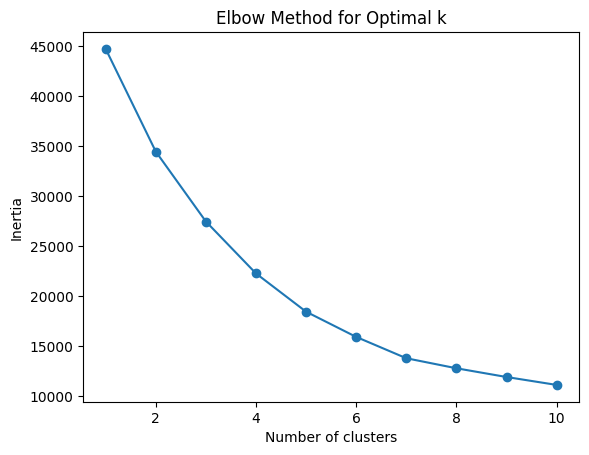

In [48]:
from sklearn.cluster import KMeans

# Determine the optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Perform K-Means Clustering and Plot

In [19]:
# Define the number of clusters (for demonstration)
n_clusters = 4

# Perform K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
clusters = kmeans.fit_predict(features_scaled)

# Add cluster labels to the DataFrame
df['Cluster'] = clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Visualize Clusters with Plotly Express

In [46]:
# Create a scatter plot with Plotly Express
fig = px.scatter(df, x='PURCHASES', y='CREDIT_LIMIT', color='Cluster',
                 color_continuous_scale='Viridis',  # You can choose other color scales
                 title='K-Means Clustering',
                 labels={'Cluster': 'Cluster'},
                 height=500)

# Add cluster centroids to the plot
centroids = kmeans.cluster_centers_
# Select the first two columns of centroids_original_scale
centroids_original_scale = scaler.inverse_transform(centroids)[:, :2]  # Transform back to original scale and select the desired columns

# Create a scatter plot for centroids
centroid_df = pd.DataFrame(centroids_original_scale, columns=['PURCHASES', 'CREDIT_LIMIT'])
centroid_df['Cluster'] = range(n_clusters)  # Add cluster labels for centroids

# Add the centroid trace using fig.add_trace()
fig.add_trace(go.Scatter(x=centroid_df['PURCHASES'], y=centroid_df['CREDIT_LIMIT'],
                         mode='markers',
                         marker=dict(size=10, symbol='cross', color='red'),
                         name='Centroids'))

# Update layout for better visualization
fig.update_layout(title='K-Means Clustering with Centroids',
                  xaxis_title='PURCHASES',
                  yaxis_title='CREDIT_LIMIT')

# Show the plot
fig.show()



In [21]:
# Hierarchical Clustering: Look at the dendrogram to understand how customers are grouped. The number of clusters you choose will affect the granularity of the segmentation.

# K-Means Clustering: The Elbow Method helps you determine the optimal number of clusters. After clustering, analyze the centroids and the distribution of customers within each cluster to tailor marketing strategies.

# Example Interpretation:
# Cluster Analysis: Identify characteristics of each cluster (e.g., high purchase amount and high credit limit vs. low purchase amount and low credit limit).
# # Marketing Strategies: Develop targeted marketing campaigns based on cluster characteristics. For instance, high-spending customers might receive premium offers.

In [21]:
# Summary
# Feature Scaling: Standardize your data to ensure that features contribute equally to the distance calculations.
# Distance Matrix: Compute the pairwise distances between observations.
# Hierarchical Clustering: Apply hierarchical clustering using the Ward method.
# Dendrogram: Visualize the hierarchical clustering results to determine how clusters are formed.